# A1: Three-Layer Neural Network

## Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import train as train
import use as use
%matplotlib inline

In [2]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((4, 1), (4, 1), (4, 1), (4, 1))

In [3]:
U = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-1, 3], [1, 3], [-2, 1], [2, -4]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[-1], [2], [3]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 output unit
U.shape, V.shape, W.shape

((2, 3), (4, 2), (3, 1))

In [4]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds
Xtrain_st

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [5]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
Ttrain_st

array([[-1.        ],
       [-0.71428571],
       [ 0.14285714],
       [ 1.57142857]])

In [7]:
from A1mysolution import forward_layer1

Zu = forward_layer1(Xtrain_st, U)
Zu

array([[-0.99967774, -0.99983726, -0.99991782],
       [-0.65775956, -0.23177837,  0.3065367 ],
       [ 0.99246605,  0.99958165,  0.99997685],
       [ 0.9999941 ,  0.99999995,  1.        ]])

In [8]:
from A1mysolution import forward_layer2

Zv = forward_layer2(Zu, V)
Zv

array([[-9.64016194e-01,  9.95062648e-01],
       [-5.23485834e-01, -4.06326878e-01],
       [-6.74345774e-03,  9.94823310e-01],
       [-5.79521329e-06,  9.95054578e-01]])

In [9]:
from A1mysolution import forward_layer3

Y = forward_layer3(Zv, W)
Y

array([[ 0.05715556],
       [-3.2659523 ],
       [ 1.97098301],
       [ 1.98515214]])

In [10]:
from A1mysolution import forward

Zu, Zv, Y = forward(Xtrain_st, U, V, W)
print(f'{Zu=}')
print(f'{Zv=}')
print(f'{Y=}')

Zu=array([[-0.99967774, -0.99983726, -0.99991782],
       [-0.65775956, -0.23177837,  0.3065367 ],
       [ 0.99246605,  0.99958165,  0.99997685],
       [ 0.9999941 ,  0.99999995,  1.        ]])
Zv=array([[-9.64016194e-01,  9.95062648e-01],
       [-5.23485834e-01, -4.06326878e-01],
       [-6.74345774e-03,  9.94823310e-01],
       [-5.79521329e-06,  9.95054578e-01]])
Y=array([[ 0.05715556],
       [-3.2659523 ],
       [ 1.97098301],
       [ 1.98515214]])


In [11]:
from A1mysolution import backward_layer3

delta_layer3 = backward_layer3(Ttrain_st, Y)
delta_layer3

array([[-1.05715556],
       [ 2.55166659],
       [-1.82812587],
       [-0.41372357]])

In [12]:
from A1mysolution import backward_layer2

delta_layer2 = backward_layer2(delta_layer3, W, Zv)
delta_layer2

array([[-0.14942424, -0.03123998],
       [ 3.70482892,  6.39114758],
       [-3.65608548, -0.05663488],
       [-0.82744715, -0.01224587]])

In [13]:
from A1mysolution import backward_layer1

delta_layer1 = backward_layer1(delta_layer2, V, Zu)
delta_layer1

array([[-1.56687861e-04,  8.70954047e-05, -2.85795848e-05],
       [ 1.29800416e+01, -9.63794665e-01, -1.64490088e+01],
       [-5.74324794e-02,  6.06940191e-03, -3.28089886e-04],
       [-1.02032268e-05,  1.79372045e-07, -1.62184098e-09]])

In [14]:
from A1mysolution import gradients

grad_U, grad_V, grad_W = gradients(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
print(f'{grad_U=}')
print(f'{grad_V=}')
print(f'{grad_W=}')

grad_U=array([[-12.92244218,   0.95763799,  16.44936549],
       [  5.83033911,  -0.43361979,  -7.35611199]])
grad_V=array([[ 0.92812794, -6.29102685],
       [ 6.74349351,  4.24106248],
       [ 5.19130234,  1.51895191],
       [ 3.19836999, -1.92147926]])
grad_W=array([[0.74733841],
       [0.30431595],
       [4.31908649]])


In [15]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[ 3.70004445],
       [-7.93083306],
       [10.39844055],
       [10.44803251]])

In [16]:
rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds = train

In [17]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
np.hstack((Ttrain, Y))

array([[ 0.00000000e+00, -1.59415209e-03],
       [ 1.00000000e+00,  9.99531326e-01],
       [ 4.00000000e+00,  4.00320313e+00],
       [ 9.00000000e+00,  8.99786767e+00]])

Text(0, 0.5, 'RMSE')

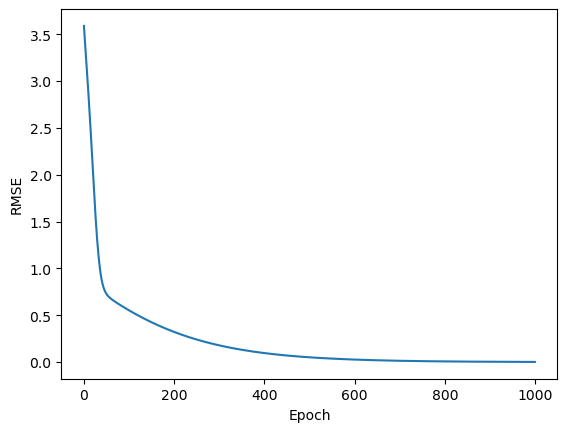

In [18]:
plt.plot(rmse_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

Here is another example with a little more interesting data.

In [19]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

In [20]:
rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)

Text(0, 0.5, 'RMSE')

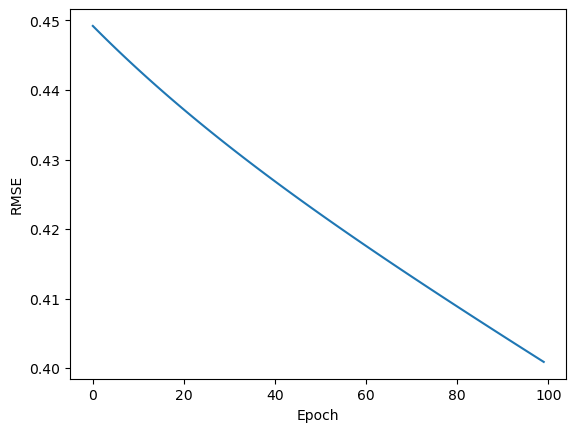

In [21]:
plt.plot(rmse_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

In [22]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

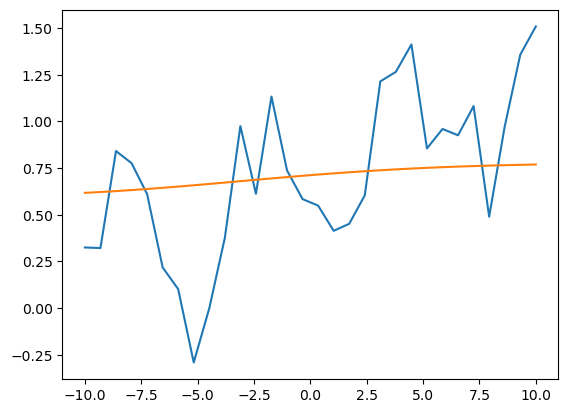

In [23]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

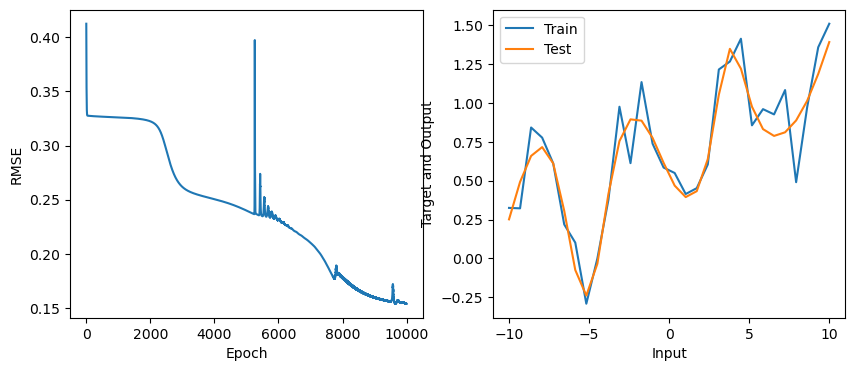

In [24]:

from matplotlib.style import use

rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds = train
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rmse_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.xlabel('Input')
plt.ylabel('Target and Output')
plt.legend();